In [1]:
suppressMessages(library("DESeq2"))
suppressMessages(library("edgeR"))

In [2]:
conds = c('P1','SCM') # specify pool ID and condition for analysis
flasks = c("F4","F5","F6") # specify replicate flasks for analysis
timepoints = c("T1","T2","T3","T4","T5", "T6") # specify timepoints for analysis
output_filename = 'competitiontime_umi_level.tsv'

In [3]:
# parameters
output_dir = './test_read_processing/'
input_dir = './test_read_processing/'
input_samples_info_df_filename =paste(input_dir, "DESEQ2_SAMPLES_",paste(conds,collapse='_'), ".tsv", sep="")
input_counts_df_filename = paste(input_dir, "DESEQ2_COUNTS_",paste(conds,collapse='_'), ".tsv", sep="")
READS_NUM_CUTOFF = 50 # can be adjusted based on read depth per sample and number of # of barcodes and UMIs
print("input files:")
print(input_samples_info_df_filename)
print(input_counts_df_filename)

samples <- read.table(input_samples_info_df_filename , header=TRUE, na.strings = "", sep='\t', row.names=1)
samples <- samples[grepl(paste(flasks,collapse="|"), samples$FLASK),]
samples <- samples[grepl(paste(timepoints,collapse="|"), samples$TIMEPOINT),]
samples$TIMEPOINT <- NULL

samples <- samples[order(row.names(samples)), ]

[1] "input files:"
[1] "./test_read_processing/DESEQ2_SAMPLES_P1_SCM.tsv"
[1] "./test_read_processing/DESEQ2_COUNTS_P1_SCM.tsv"


In [4]:
samples

,POOL,COND,FLASK,GENERATION
,<fct>,<fct>,<fct>,<dbl>
P1_SCM_T1_F4,P1,SCM,F4,5.073472
P1_SCM_T1_F5,P1,SCM,F5,5.076816
P1_SCM_T1_F6,P1,SCM,F6,5.097222
P1_SCM_T2_F4,P1,SCM,F4,9.739355
P1_SCM_T2_F5,P1,SCM,F5,9.689740
P1_SCM_T2_F6,P1,SCM,F6,9.688451
P1_SCM_T3_F4,P1,SCM,F4,15.085530
P1_SCM_T3_F5,P1,SCM,F5,14.702672
P1_SCM_T3_F6,P1,SCM,F6,14.897904


In [5]:
# loading oligo counts
sample_counts <- read.csv(input_counts_df_filename , header=TRUE, na.strings = "", sep='\t', row.names=1)
sample_counts <- sample_counts[ ,grep(paste(timepoints,collapse="|"), names(sample_counts))]
sample_counts <- sample_counts[ ,grep(paste(flasks,collapse="|"), names(sample_counts))]
sample_counts <- sample_counts[ , order(names(sample_counts))]

In [6]:
head(sample_counts)

,P1_SCM_T1_F4,P1_SCM_T1_F5,P1_SCM_T1_F6,P1_SCM_T2_F4,P1_SCM_T2_F5,P1_SCM_T2_F6,P1_SCM_T3_F4,P1_SCM_T3_F5,P1_SCM_T3_F6,P1_SCM_T4_F4,P1_SCM_T4_F5,P1_SCM_T4_F6,P1_SCM_T5_F4,P1_SCM_T5_F5,P1_SCM_T5_F6,P1_SCM_T6_F4,P1_SCM_T6_F5,P1_SCM_T6_F6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ergosterol_001_001_UMI_1,1,0,0,1,1,0,1,1,0,1,1,0,0,1,0,0,0,0
ergosterol_001_001_UMI_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ergosterol_001_001_UMI_4,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0
ergosterol_001_001_UMI_6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ergosterol_001_001_UMI_13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ergosterol_001_001_UMI_14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:

### Check that sample names match in both files
all(colnames(sample_counts) %in% rownames(samples))
all(colnames(sample_counts) == rownames(samples))

[1] TRUE

[1] TRUE

In [8]:
##########################################################################################################################
# DESeq2 using all time points
dge <- DGEList(counts=sample_counts)

# filtering oligos with low read number
isexpr <- (rowSums(dge$counts) >= READS_NUM_CUTOFF)

dds <- suppressMessages(DESeq2::DESeqDataSetFromMatrix(countData = sample_counts[isexpr,],
                              colData = samples,
                              design= ~ GENERATION + FLASK))

dds <- DESeq(dds)
resultsNames(dds) # lists the coefficients
res <- results(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



[1] "Intercept"      "GENERATION"     "FLASK_F5_vs_F4" "FLASK_F6_vs_F4"

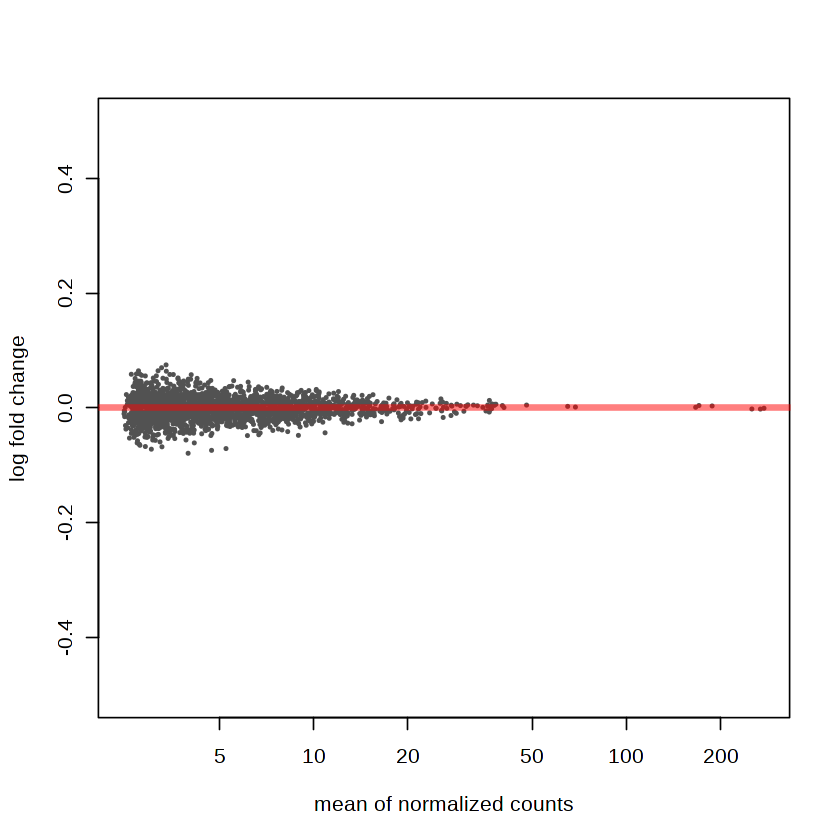

In [9]:
res_gen <- results(dds, name="GENERATION")
write.table(res_gen, 
            file=paste(output_dir, "deseq2_res_bar_", paste(conds,collapse="_"), "_", output_filename, sep=""), 
            sep="\t", quote = FALSE,na = "", row.names=TRUE, col.names = TRUE)
DESeq2::plotMA(res_gen, ylim=c(-0.5,0.5))

In [10]:
res_gen

log2 fold change (MLE): GENERATION 
Wald test p-value: GENERATION 
DataFrame with 2373 rows and 6 columns
                                 baseMean      log2FoldChange
                                <numeric>           <numeric>
ergosterol_001_008_UMI_4  2.6297330176854 0.00961150675656177
ergosterol_001_008_UMI_6 2.66597694277709 -0.0122811060751145
ergosterol_001_019_UMI_2 3.30189379284516 -0.0305052302772895
ergosterol_001_019_UMI_6 3.22216672743157 -0.0290998376940595
ergosterol_001_022_UMI_1 3.82798564309977 0.00160206946527796
...                                   ...                 ...
technical_192_092_UMI_4  2.79270273697923 -0.0199154636858057
technical_192_092_UMI_6  2.70635151672165  0.0371340601495922
technical_192_103_UMI_6  3.03829066617309  -0.011899966999926
technical_192_108_UMI_4  3.95001767961251  0.0452335498718697
technical_192_113_UMI_2  2.90923303518134 -0.0201006359195866
                                      lfcSE               stat
                         